### 인공신경망(ANN)

- 인공신경망 : 생물학적 뉴런에서 영감을 받아 만든 머신러닝 알고리즘, 신경망은 기존의 머신러닝 알고리즘으로 다루기 어려웠던 이미지, 음성, 텍스트 분야에서 뛰어난 성능을 발휘하면서 
크게 주목을 받고 있으며 종종 딥러닝이라고 부름

- 밀집층(dense layer, or 완전연결층(fully connected layer)) : 케라스의 레이어 안의 가장 기본이 되는 층으로 양쪽의 뉴런이 모두 연결되어 있음

- 텐서플로 : 구글이 만든 딥러닝 라이브러리로 CPU와 GPU를 이용해 인공신경망 모델을 효율적으로 훈련하며 모델 구축과 서비스에 필요한 다양한 도구 제공, 텐서플로 2.0부터는 신경망 모델을 빠르게 구성할 수 있는 케라스를 핵심 api로 채택. 케라스를 사용하면 간단한 모델에서 아주 복잡한 모델까지 손쉽게 만들 수 있음

- 원-핫 인코딩 : 타깃값을 해당 클래스만 1이고 나머지는 모두 0인 배열로 만드는 것, 다중 분류에서 크로스 엔트로피 손실 함수를 사용하려면 0,1,2와 같이 정수로 된 타깃값을 인코딩으로 변환

- 절편 : 뉴런마다 더해짐

- 활성화 함수 : 뉴런의 선형방정식 계산 결과에 적용되는 함수


In [1]:
# 라이브러리 호출

import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

In [2]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [25]:
# 훈련 데이터 shape
print(train_input.shape, train_target.shape)
# 테스트 데이터 shape
print(test_input.shape, test_target.shape)

(60000, 28, 28) (48000,)
(10000, 28, 28) (10000,)


In [27]:
train_scaled = train_input / 255.0 # 정규화
train_scaled = train_scaled.reshape(-1,28*28) # 1차원 배열 변환 

In [28]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state=42)

In [6]:
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)


### 밀집층(양쪽의 뉴런이 모두 연결하고 있기 때문에 완전연결층)

In [7]:
dense = keras.layers.Dense(10, activation = 'softmax', input_shape = (784,)) # 밀집층 객체
model = keras.Sequential(dense) # 신경망 모델 제작

- 케라스의 Dense 클래스를 사용해 밀집층 마들기 - 필요한 매개변수는 뉴런 개수, 뉴런의 출력적용 함수, 입력크기
- 뉴런 개수는 10개인 패션아이템을 분류하기 때문에 10개, 적용 함수는 softmax 적용(이진 분류는 sigmoid 적용), 784개의 픽셀값 받음
- Sequential 클래스의 객체를 만들 때 앞에서 만든 밀집층의 객체 dense를 전달함, 여기서 만든 모델이 신경망 모델

- 은닉층에 활성화함수를 적용하는 이유 : 은닉층이 활성화함수가 없이 x와 가중치의 곱으로만 표현되어 있다면 뒤의 출력층과 합쳐서 하나의 층으로 표현할 수 있을 것. 은닉층에 활성화 함수를 거쳐서 비선형 함수로 데이터를 변형해서 단순히 선형식이 합쳐지지 못하도록 해야한다.

In [8]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics='accuracy') 
# one-hot encoding으로 sparse하게 표현
# 모델 손실함수와 metrics 설정

- 이진 분류 : binary_crossentropy
- 다중 분류 : categorical_crossentropy
- 로지스틱 손실 함수는 다중 분류를 위한 손실 함수인 크로스 엔트로피(cross entropy) 손실 함수를 이진 분류 버전으로 만든 것

In [29]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5650 - accuracy: 0.8075
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4081 - accuracy: 0.8525
Epoch 3/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3751 - accuracy: 0.8660
Epoch 4/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3515 - accuracy: 0.8733
Epoch 5/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3343 - accuracy: 0.8794


In [30]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3566 - accuracy: 0.8681


[0.3565978705883026, 0.8680833578109741]

### 심층신경망(DNN)

- 딥러닝 : 딥러닝은 인공신경망과 거의 동의어로 사용되는 경우가 많으며 혹은 심층 신경망을 딥러닝이라고 부름. 심층 신경망은 여러 개의 층을 가진 인공 신경망임

- 심층 신경망 : 2개 이상의 층을 포함한 신경망으로 종종 다층 인공신경망, 심층 신경망, 딥러닝을 같은 의미로 사용

- 렐로 함수(Relu Function) : 입력이 양수일 경우 마치 활성화 함수가 없는 것처럼 그냥 입력을 통과시키고 음수일 경우에는 0으로 만드는 함수

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0 # 픽셀 값 정규화
train_scaled = train_scaled.reshape(-1,28*28) # 28*28 2차원 배열 784 크기의 1차원 배열로 변환

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)
# train을 train과 validation으로 나누기

In [3]:
# 층을 생성하는 방법, 각 밀집층 객체를 만들고 keras.Sequential에 인자로 전달

dense1 = keras.layers.Dense(100, activation = 'sigmoid', input_shape = (784,))
dense2 = keras.layers.Dense(10, activation = 'softmax') # 다중 선형 회귀 사용

model = keras.Sequential([dense1, dense2])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


- dense1이 입력층과 은닉층을 연결하는 밀집층, dense2는 은닉층과 출력층을 연결하는 밀집층

- dense1에 몇 개의 뉴런을 둬야할지에 대한 판단은 상당한 경험을 요하나, 출력층 뉴런보다는 많이 만들어야 함

- output shape의 첫 번째 차원이 None인 이유 : 케라스는 미니 배치 경사 하강법을 사용해서 입력 데이터에 따라 크기가 달라진다.

- params는 각 층의 모델 파라미터 개수 / 78,500 => 입력층 노드 784개, 은닉층 노드 100개의 곱에 절편 100개를 더한 값

In [11]:
# 다른 방법 1

model = keras.Sequential([
    keras.layers.Dense(100,
                       activation = 'sigmoid',
                       input_shape = (784,),
                       name = 'hidden'),
    keras.layers.Dense(10,
                       activation = 'softmax',
                       name = 'output')
], name = '패션 MINST 모델')

model.summary()

Model: "패션 MINST 모델"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [32]:
# 다른 방법 2, add를 사용해 층이 많을 때 편리함

model = keras.Sequential()
model.add(keras.layers.Dense(100,
                             activation = 'sigmoid',
                             input_shape = (784,),
                             name = 'hidden'))
model.add(keras.layers.Dense(10,
                             activation = 'softmax',
                             name = 'output'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics='accuracy')
# binary_categorical_crossentropy : 이진 분류
# sparse_categorical_crossentropy : 삼진 분류 이상

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5665 - accuracy: 0.8069
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4090 - accuracy: 0.8535
Epoch 3/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3743 - accuracy: 0.8653
Epoch 4/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3504 - accuracy: 0.8738
Epoch 5/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3340 - accuracy: 0.8795


In [34]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3525 - accuracy: 0.8738


[0.3525139093399048, 0.8738333582878113]

### 옵티마이저

- flatten : 데이터를 1차원 배열로 바꿔주는 메서드, 입력차원을 일렬로 배치하는 역할만 함, 학습층이 아니고 모델 파라미터 개수도 0

- sigmoid의 단점 : 양 끝으로 갈수록 그래프가 누워있어서 올바른 출력을 만드는데 신속하게 대응하지 못함, 특히 층이 길어질수록 학습을 더 어렵게 만듦.

In [3]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation = 'relu')) # sigmoid에서 relu로 변경
model.add(keras.layers.Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 표준화 작업 및 데이터 분할

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state=42)

In [7]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)
model.evaluate(val_scaled, val_target)

# 최초 ANN보다 정확도 향상 확인

Epoch 1/5
1500/1500 [==============================] - 10s 6ms/step - loss: 0.5281 - accuracy: 0.8126
Epoch 2/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3910 - accuracy: 0.8585
Epoch 3/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3562 - accuracy: 0.8708
Epoch 4/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3347 - accuracy: 0.8797
Epoch 5/5
375/375 [==============================] - 1s 2ms/step - loss: 0.3627 - accuracy: 0.8764


[0.36269161105155945, 0.8764166831970215]

In [38]:
# Adam : 옵티마이저의 일종, 모멘텀 최적화와 RMSprop의 장점을 접목

model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy', 
              metrics='accuracy' )
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.5202 - accuracy: 0.8176
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3898 - accuracy: 0.8608
Epoch 3/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3502 - accuracy: 0.8745
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3253 - accuracy: 0.8823
Epoch 5/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3080 - accuracy: 0.8863


In [8]:
model.evaluate(val_scaled, val_target)

# 최초 ANN보다 정확도 향상 확인 (0.868 -> 0.879)

375/375 [==============================] - 1s 3ms/step - loss: 0.3627 - accuracy: 0.8764


[0.36269161105155945, 0.8764166831970215]

### 히스토리와 손실 곡선

In [15]:
# 신경망 모델에 레이어를 추가하는 함수

def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape = (28,28)))
    model.add(keras.layers.Dense(100, activation = 'relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation = 'softmax'))
    return model

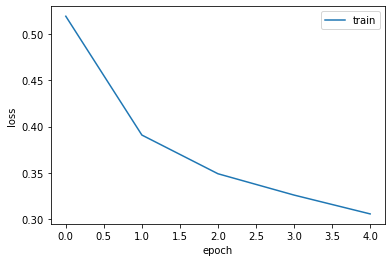

In [12]:
model = model_fn()
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

# verbose = 0을 사용하면 훈련 과정 출력 X

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [13]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


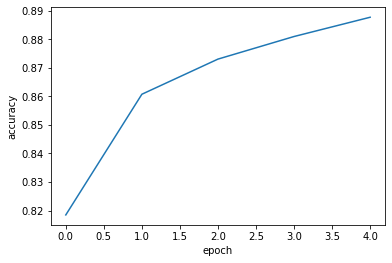

In [14]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

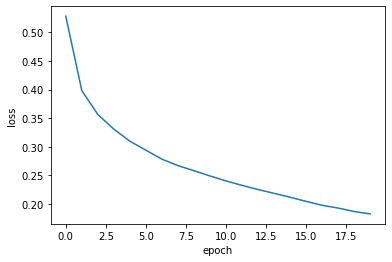

In [15]:
# 에폭을 늘려서 손실 변화도 확인

model = model_fn()
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 손실이 감소함을 확인

### 검증 손실

In [18]:
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, validation_data = (val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 10s 6ms/step - loss: 0.5302 - accuracy: 0.8116 - val_loss: 0.5604 - val_accuracy: 0.8061
Epoch 2/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3935 - accuracy: 0.8590 - val_loss: 0.3977 - val_accuracy: 0.8611
Epoch 3/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.3544 - accuracy: 0.8724 - val_loss: 0.3950 - val_accuracy: 0.8635
Epoch 4/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3339 - accuracy: 0.8803 - val_loss: 0.3581 - val_accuracy: 0.8756
Epoch 5/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3191 - accuracy: 0.8859 - val_loss: 0.3544 - val_accuracy: 0.8786
Epoch 6/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3099 - accuracy: 0.8905 - val_loss: 0.3831 - val_accuracy: 0.8764
Epoch 7/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2999 - accuracy: 0.8944 - val_loss: 0.3756 - val_accuracy

In [19]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


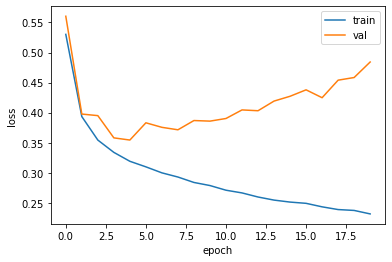

In [20]:
# 훈련 데이터와 검증 데이터의 손실 곡선 확인

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

- 다섯 번째 에폭 이후 과적합 발생

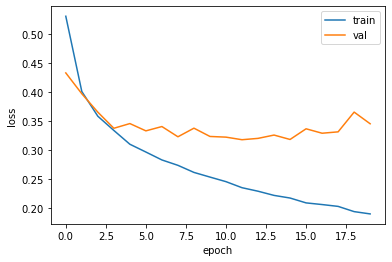

In [23]:
# 옵티마이저 하이퍼 파라미터 조정으로 과대적합 완화

model = model_fn()
adam = keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, validation_data=(val_scaled, val_target), verbose = 0)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()


- 이전과 비교해 과대적합 감소 확인
- RMSprop은 많은 문제에서 잘 작동하지만, 다른 옵티마이저를 사용한다면 Adam이 좋은 선택
- Adam은 적응적 학습률을 사용, 에폭이 진행되면서 학습률의 크기 조정 가능

### 드롭아웃

- 훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서(뉴런의 출력을 0으로 만들어) 과대적합 방지
- 일부 뉴런이 랜덤하게 꺼지면 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있고, 모든 입력에 주의를 기울어야 함

In [32]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_15 (Flatten)        (None, 784)               0         
                                                                 
 dense_32 (Dense)            (None, 100)               78500     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_33 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


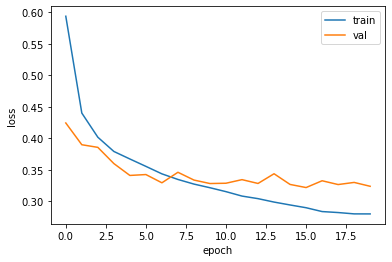

In [33]:
model.compile(optimizer='adam', loss ='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled,val_target), verbose = 0)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

- Dropout 적용 이전보다 과대적합 감소 확인

### 모델 저장과 복원

In [10]:
model.save_weights('model-weight.h5') 
model.save('model-whole.h5')

In [11]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weight.h5')

In [ ]:
!is -al *.h5 # 파일이 잘 만들어졌는지 확인, 셀 명령을 실행할때 ! 사용

In [13]:
model = keras.models.load_model('model-whole.h5') # 모델 로드
model.evaluate(val_scaled, val_target) # 검증 데이터 삽입

375/375 [==============================] - 2s 4ms/step - loss: 0.3566 - accuracy: 0.8845


[0.35660478472709656, 0.8845000267028809]

In [18]:
import numpy as np

model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weight.h5')

val_labels = np.argmax(model.predict(val_scaled),axis = 1) 
# 모델 결과에서 가장 큰 값 선택, axis = 1은 배열의 마지막 차원을 따라 최댓값을 고름
# 검증 세트는 2차원 배열이기 때문에 마지막 차원은 1이 됨.
# axis = 1 이면 열을 따라 각 행의 최댓값의 인덱스 선택
# axis = 0 이면 행을 따라 각 열의 최댓값의 인덱스

print(np.mean(val_labels == val_target))

375/375 [==============================] - 1s 3ms/step
0.8845


### 9.28 수업

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0 # 픽셀 값 정규화
train_scaled = train_scaled.reshape(-1,28*28) # 28*28 2차원 배열 784 크기의 1차원 배열로 변환

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)
# train을 train과 validation으로 나누기

In [6]:
# 모델에 층을 추가하는 방법 1

dense1 = keras.layers.Dense(100, activation = 'sigmoid', input_shape = (784,))
# dense1은 은닉층으로, 100개의 뉴런을 가짐, 활성화 함수를 sigmoid로 지정, input 매개변수에서 입력 크기를 784로 지정
# 은닉층의 뉴런 개수를 정하는데 특별한 기준은 없으나 몇 개의 뉴런을 둬야할지 결정하는 것은 경험이 필요, 단 은닉층의 뉴런 개수는 적어도 출력층의 뉴런보다 많아야 함

In [7]:
dense2 = keras.layers.Dense(10, activation = 'softmax')
# 출력층, 10개의 클래스를 분류하므로 10개의 뉴런을 두었고 활성화 함수는 softmax로 지정

In [8]:
model = keras.Sequential([dense1, dense2])
model.summary()

# 케라스 모델의 fit 메서드에 훈련 데이터를 주입하면 이 데이터를 잘게 나누어 여러번 걸쳐 경사 하강법 단계를 수행
# 미니배치 경사 하강법으로, 기본 미니배치 크기는 32개

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [9]:
# 모델에 층을 추가하는 방법 2

model2 = keras.Sequential(
    [
    keras.layers.Dense(100, activation = 'sigmoid', input_shape =(784,), name = 'hidden'),
    keras.layers.Dense(10, activation = 'softmax', name = 'output')
    ],
    name = 'MINST Model'
)

model2.summary()

Model: "MINST Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [10]:
model3 = keras.Sequential()

model3.add(keras.layers.Dense(100, activation = 'sigmoid', input_shape = (784,)))
model3.add(keras.layers.Dense(10, activation = 'softmax'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 100)               78500     
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [12]:
model3.compile(loss = 'sparse_categorical_crossentropy', metrics='accuracy')
model3.fit(train_scaled, train_target, epochs = 10, verbose = 0, batch_size=20)

In [14]:
model3.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 3ms/step - loss: 0.3370 - accuracy: 0.8850


[0.33701005578041077, 0.8849999904632568]

## 9.30 수업

### 신경망 모델 훈련

- 드롭아웃 : 훈련과정에서 층에 있는 일부 뉴런을 랜덤하게 껴서(즉, 뉴런의 출력을 0으로 만들어) 과대적합을 막음

- 콜백 : 케라스에서 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체로 keras, callbacks 패키지 아래에 있는 클래스로 fit() 메서드의 callback 매개변수에 리스트로 전달하여 사용

- 적응적 학습률 : 모델이 최적점에 가까이 갈수록 안정적으로 수렴하도록 학습률을 낮추도록 조정하는 방법, 이런 방식들은 학습률 매개변수를 튜닝하는 수고를 덜 수 있는 것이 장점

In [10]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0 

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [3]:
# 모델 만들기 - 사용자 정의 함수
# a_layer의 default는 None

def model_fn(a_layer = None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape = (28,28)))
    model.add(keras.layers.Dense(100, activation = 'relu'))
    if a_layer:
        model.add(a_layer)
    # if 구문의 역할은 model_fn() 함수에 (a_layer 매개변수로) 케라스 층을 추가하면 은닉층 뒤에 또 하나의 층을 추가
    model.add(keras.layers.Dense(10, activation = 'softmax'))
    return model
    
# 여기서는 a_layer 매개변수로 층을 추가하지 않고 단순하게 model_fn() 함수를 호출
# 모델 구조를 출력하면 이전 절과 동일한 모델구조임을 확인

model = model_fn()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 5, verbose = 1)

Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2591 - accuracy: 0.9109
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2546 - accuracy: 0.9122
Epoch 3/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2473 - accuracy: 0.9146
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2419 - accuracy: 0.9169
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2373 - accuracy: 0.9178


In [46]:
print(history.history.keys())
print(history.history['accuracy'])
print(history.history['loss'])

# 케라스는 기본적으로 에폭마다 손실 계산
# 정확도는 compile() 메서드에서 metrics 매개변수에 accuracy를 추가했기 때문에 history 속성에 포함

dict_keys(['loss', 'accuracy'])
[0.910854160785675, 0.9121666550636292, 0.9145833253860474, 0.9169374704360962, 0.9177916646003723]
[0.2590738832950592, 0.25456497073173523, 0.24732568860054016, 0.24190294742584229, 0.23726911842823029]


In [52]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

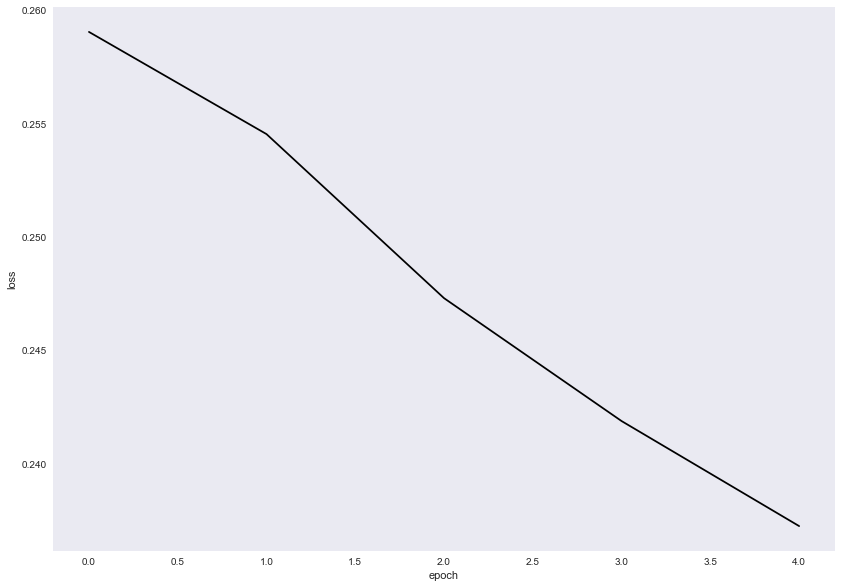

In [58]:
plt.figure(figsize=(14,10))
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.style.use('dark_background')
plt.show()

In [59]:
# 검증 손실 - 훈련 세트와 검증 세트의 그래프

model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0,
                    validation_data = (val_scaled, val_target))

In [75]:
history.history.keys()
history.history['val_accuracy']

[0.8524166941642761,
 0.8686666488647461,
 0.8617500066757202,
 0.8742499947547913,
 0.8662499785423279,
 0.8802499771118164,
 0.8765833377838135,
 0.8774999976158142,
 0.874750018119812,
 0.8790000081062317,
 0.8844166398048401,
 0.877916693687439,
 0.8816666603088379,
 0.8758333325386047,
 0.8792499899864197,
 0.8831666707992554,
 0.8817499876022339,
 0.8842499852180481,
 0.8812500238418579,
 0.8761666417121887]

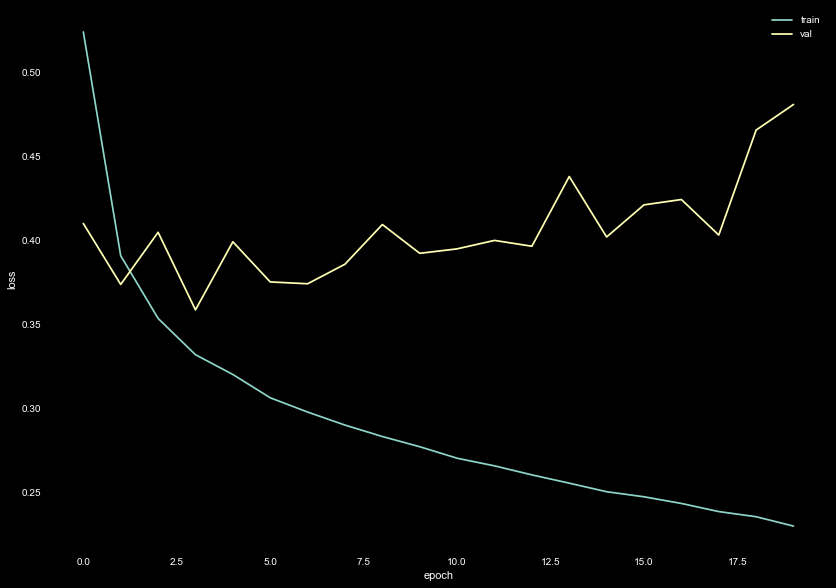

In [79]:
plt.figure(figsize = (14,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','val']) # 리스트 형식
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

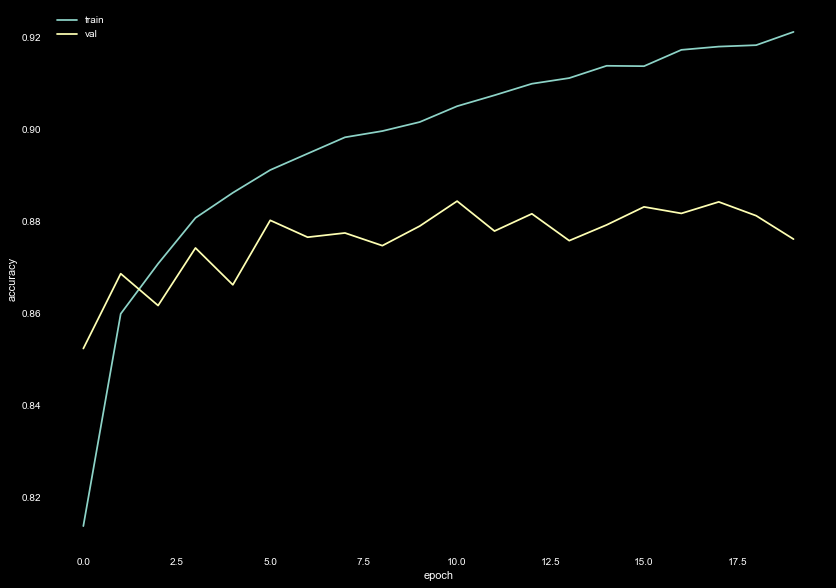

In [77]:
plt.figure(figsize = (14,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train','val'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

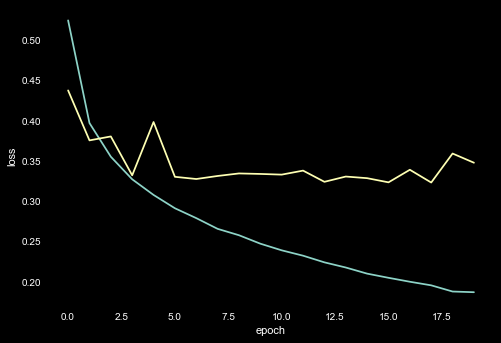

In [80]:
# adam

model = model_fn()
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0, validation_data=(val_scaled,val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [81]:
# dropout

model = model_fn(keras.layers.Dropout(0.3))
model.summary()

# 드롭아웃 층은 훈련되는 모델 파라미터가 없고 입/출력의 크기가 동일
# 일부 뉴런의 출력을 0으로 만들지만 전체 출력 배열의 크기를 바꾸지는 않음
# 어떤 층의 뒤에 드롭아웃을 두어 층의 출력을 랜덤하게 0으로 만들고, 층으로 사용되지만 훈련되는 모델 파라미터는 없음.


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


### 10.05 수업

In [5]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0 

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [6]:
def model_fn(a_layer = None) :
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape = (28,28)))
    model.add(keras.layers.Dense(100, activation = 'relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation = 'softmax'))
    return model

In [7]:
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 5, verbose =0)

In [11]:
print(history.history.keys())
print(history.history['accuracy'])

dict_keys(['loss', 'accuracy'])
[0.8130833506584167, 0.8570625185966492, 0.8709166646003723, 0.8784375190734863, 0.8856458067893982]


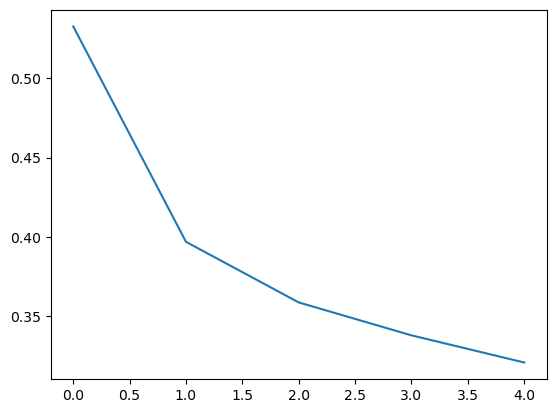

In [17]:
plt.plot(history.history['loss'])
plt.show()

In [18]:
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0,
                    validation_data = (val_scaled, val_target)) # 훈련 데이터로 사용되지 않은 데이터

In [19]:
print(history.history.keys())
print(history.history['accuracy'])

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
[0.8094791769981384, 0.859208345413208, 0.8711666464805603, 0.8812500238418579, 0.8864166736602783, 0.8914583325386047, 0.8940208554267883, 0.8972291946411133, 0.9008541703224182, 0.9030625224113464, 0.9045208096504211, 0.9090833067893982, 0.9096875190734863, 0.9117083549499512, 0.9150416851043701, 0.9144791960716248, 0.9185624718666077, 0.9188541769981384, 0.9183541536331177, 0.9204791784286499]


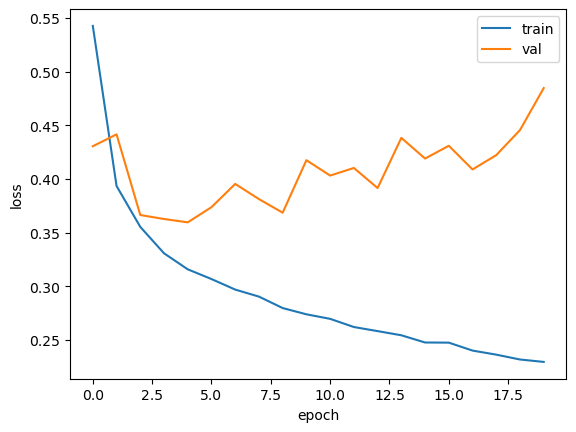

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','val']) # 리스트 형식
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [7]:
# 1. 옵티마이저 조정을 통해 과대적합 완화 가능

model = model_fn()
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0, validation_data = (val_scaled, val_target), batch_size = 20)

KeyboardInterrupt: 

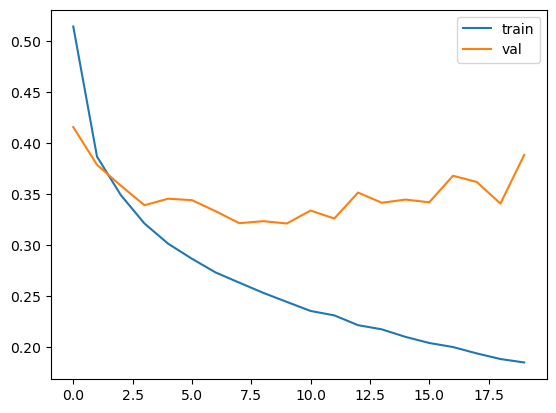

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','val'])
plt.show() # 더 나은 손실 곡선을 얻으려면 학습률을 조정해서 다시 시도해볼 수 있음.

In [25]:
# 2, dropout을 사용해 일부 뉴런을 랜덤하게 꺼서 과대적합 예방

model = model_fn(keras.layers.Dropout(0.3)) # 층을 추가, 30%정도 드롭아웃
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


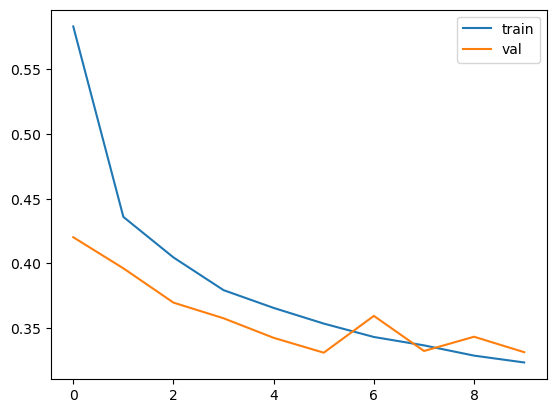

In [26]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 10, verbose = 0, validation_data = (val_scaled, val_target), batch_size = 20)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','val'])
plt.show() 

### 10.07 수업

In [22]:
# 콜백 : 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체로 keras.collbacks 패키지 아래에 있는 클래스들
# fit() 메서드의 callbacks 매개변수에 리스트로 전달하여 사용
# ModelCheckPoint 콜백은 기본적으로 최상의 검증 점수를 만드는 모델을 저장

from gc import callbacks
from sklearn import metrics


model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
checkpoint_pb = keras.callbacks.ModelCheckpoint('best-model.h5')
model.fit(train_scaled, train_target, epochs = 20, verbose = 0, validation_data=(val_scaled,val_target),callbacks = [checkpoint_pb])

In [23]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 4ms/step - loss: 0.3174 - accuracy: 0.8876


[0.31742939352989197, 0.887583315372467]